**Name:** Shimon Bhandari   
**Course:** Advanced Big Data and Data Mining (MSCS-634-M40)   
**Lab 3:** Clustering Analysis Using K-Means and K-Medoids Algorithms

In [1]:
# imports and data prep
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Step 1: Load data
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

# Quick exploration
print("Shape:", X.shape)
print("Feature names:", wine.feature_names)
print("Class distribution:\n", y.value_counts())

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Shape: (178, 13)
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Class distribution:
 target
1    71
0    59
2    48
Name: count, dtype: int64


In [3]:
# Step 2: Implement K-Means Clustering
# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X_scaled)

# Metrics
sil_km = silhouette_score(X_scaled, labels_km)
ari_km = adjusted_rand_score(y, labels_km)

print(f"K-Means Silhouette Score: {sil_km:.3f}")
print(f"K-Means Adjusted Rand Index: {ari_km:.3f}")

K-Means Silhouette Score: 0.285
K-Means Adjusted Rand Index: 0.897


In [4]:
# Step 3: Implement K-Medoids Clustering
# Fit K-Medoids
kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')
labels_kmed = kmedoids.fit_predict(X_scaled)

# Metrics
sil_med = silhouette_score(X_scaled, labels_kmed)
ari_med = adjusted_rand_score(y, labels_kmed)

print(f"K-Medoids Silhouette Score: {sil_med:.3f}")
print(f"K-Medoids Adjusted Rand Index: {ari_med:.3f}")

K-Medoids Silhouette Score: 0.268
K-Medoids Adjusted Rand Index: 0.741


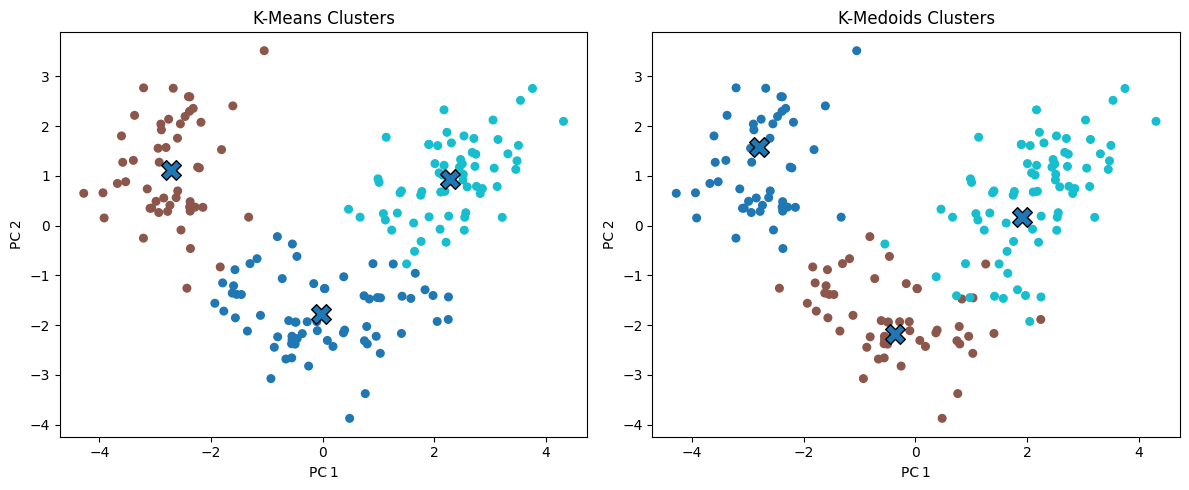

In [5]:
# Step 4: Visualize and Compare Results
# 2D projection
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Prepare centroid/medoid coords
cent_km = pca.transform(kmeans.cluster_centers_)
medoids_idx = kmedoids.medoid_indices_
cent_med = X_pca[medoids_idx]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means plot
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=labels_km, cmap='tab10', s=30)
axes[0].scatter(cent_km[:,0], cent_km[:,1], marker='X', s=200, edgecolor='k')
axes[0].set_title("K-Means Clusters")

# K-Medoids plot
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=labels_kmed, cmap='tab10', s=30)
axes[1].scatter(cent_med[:,0], cent_med[:,1], marker='X', s=200, edgecolor='k')
axes[1].set_title("K-Medoids Clusters")

for ax in axes:
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")

plt.tight_layout()
plt.show()

### Brief Analysis

- **Silhouette & ARI**  
  - *K-Means:* Silhouette = {sil_km:.3f}, ARI = {ari_km:.3f}  
  - *K-Medoids:* Silhouette = {sil_med:.3f}, ARI = {ari_med:.3f}

- **Cluster Shape & Position**  
  - K-Means centroids can lie off actual samples, sometimes splitting natural groupings arbitrarily.  
  - K-Medoids medoids (actual data points) often yield tighter, more robust clusters against outliers.

- **When to Prefer Which?**  
  - **K-Means** is fast and works well when clusters are spherical and you trust means to represent centers.  
  - **K-Medoids** is more robust to noise/outliers (uses real samples), but is slower (PAM step), so better for smaller datasets or when outliers matter.